<a href="https://colab.research.google.com/github/Midnightx689/Dropout-Tables/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Big Picture and Setup**

In [ ]:
# general imports here
import pandas as pd
import numpy as np
import os
import urllib.request

**Step 2: Get the data**

In [ ]:
# Create a directory to store data
data_path = "datasets/dropout-tables"
os.makedirs(data_path, exist_ok=True)

# File URLs
files = {
    "dropout_rates.csv": "https://raw.githubusercontent.com/Midnightx689/Dropout-Tables/main/cohort_graduation_and_dropout_rates.csv",
    "absenteeism.xlsx": "https://github.com/Midnightx689/Dropout-Tables/raw/main/chronic-absenteeism-school-2022.xlsx",
    "behavior.xlsx": "https://github.com/Midnightx689/Dropout-Tables/raw/main/student_behavior.xlsx",
}

# Download files
for filename, url in files.items():
    file_path = os.path.join(data_path, filename)
    urllib.request.urlretrieve(url, file_path)
    print(f"Downloaded {filename} to {file_path}")

Downloaded dropout_rates.csv to datasets/dropout-tables/dropout_rates.csv
Downloaded absenteeism.xlsx to datasets/dropout-tables/absenteeism.xlsx
Downloaded behavior.xlsx to datasets/dropout-tables/behavior.xlsx


In [ ]:
def load_dropout_data(data_path=data_path):
    csv_path = os.path.join(data_path, "dropout_rates.csv")
    return pd.read_csv(csv_path)

dropout_rates = load_dropout_data()
dropout_rates.head()

,Cohort Year,Level,Division Number,Division Name,School Number,School Name,Type of Graduation Rate,Rate Type,Graduation Rate,Students in Cohort,...,Other Diplomas,Applied Studies,GED,ISAEP,Certificate of Completion,Completion Rate,Dropout Rate,Dropouts,Still Enrolled,Long-Term Absence
0,2023,School,1.0,Accomack County,540.0,Arcadia High,On-Time Graduation Rate,4 yr rate,83.71%,178,...,0,<,2,0,0,84.83%,3.93%,7,4,16
1,2023,School,1.0,Accomack County,580.0,Chincoteague High,On-Time Graduation Rate,4 yr rate,91.67%,36,...,0,0,0,0,0,91.67%,5.56%,2,0,1
2,2023,School,1.0,Accomack County,70.0,Nandua High,On-Time Graduation Rate,4 yr rate,91.72%,157,...,0,<,0,0,0,91.72%,7.01%,11,1,1
3,2023,School,1.0,Accomack County,530.0,Tangier Combined,On-Time Graduation Rate,4 yr rate,<,<,...,<,<,<,<,<,<,<,<,<,<
4,2023,School,2.0,Albemarle County,880.0,Albemarle High,On-Time Graduation Rate,4 yr rate,92.02%,476,...,0,10,1,2,0,92.65%,5.88%,28,7,0


In [ ]:
dropout_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cohort Year                335 non-null    int64  
 1   Level                      335 non-null    object 
 2   Division Number            334 non-null    float64
 3   Division Name              334 non-null    object 
 4   School Number              334 non-null    float64
 5   School Name                334 non-null    object 
 6   Type of Graduation Rate    335 non-null    object 
 7   Rate Type                  335 non-null    object 
 8   Graduation Rate            335 non-null    object 
 9   Students in Cohort         335 non-null    object 
 10  Total Graduates            335 non-null    object 
 11  Advanced Studies           335 non-null    object 
 12  IB                         335 non-null    object 
 13  Standard                   335 non-null    object 

In [ ]:
missing = dropout_rates.isnull().sum() # check missing values
missing = missing[missing > 0]
print(missing)

Division Number    1
Division Name      1
School Number      1
School Name        1
dtype: int64


In [ ]:
dropout_rates.describe()

,Cohort Year,Division Number,School Number
count,335.0,334.000000,334.000000
mean,2023.0,68.260479,590.155689
std,0.0,41.963817,621.557638
min,2023.0,1.000000,10.000000
25%,2023.0,29.000000,142.750000
50%,2023.0,68.500000,460.000000
75%,2023.0,101.750000,827.750000
max,2023.0,207.000000,5130.000000


In [ ]:
import pandas as pd
import numpy as np

# Load your dataset (assuming it's a DataFrame named 'dropout_rates')

# Step 1: Strip whitespace and replace problematic values
dropout_rates = dropout_rates.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
dropout_rates.replace({"<": np.nan, "N/A": np.nan, "nan": np.nan, "": np.nan}, inplace=True)

# Step 2: Convert percentage columns (remove % and convert to float)
percent_columns = ["Graduation Rate", "Completion Rate", "Dropout Rate"]  # Add relevant column names
for col in percent_columns:
    dropout_rates[col] = dropout_rates[col].astype(str).str.rstrip("%").astype(float)

# Step 3: Convert numeric columns
numeric_columns = ["Students in Cohort", "Other Diplomas", "Applied Studies", "GED",
                   "ISAEP", "Certificate of Completion", "Dropouts", "Still Enrolled", "Long-Term Absence"]
dropout_rates[numeric_columns] = dropout_rates[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Step 4: Handle missing values (example: fill NaNs with 0)
dropout_rates.fillna(0, inplace=True)

# Display cleaned data
print(dropout_rates.head())


   Cohort Year   Level  Division Number     Division Name  School Number  \
0         2023  School              1.0   Accomack County          540.0   
1         2023  School              1.0   Accomack County          580.0   
2         2023  School              1.0   Accomack County           70.0   
3         2023  School              1.0   Accomack County          530.0   
4         2023  School              2.0  Albemarle County          880.0   

         School Name  Type of Graduation Rate  Rate Type  Graduation Rate  \
0       Arcadia High  On-Time Graduation Rate  4 yr rate            83.71   
1  Chincoteague High  On-Time Graduation Rate  4 yr rate            91.67   
2        Nandua High  On-Time Graduation Rate  4 yr rate            91.72   
3   Tangier Combined  On-Time Graduation Rate  4 yr rate             0.00   
4     Albemarle High  On-Time Graduation Rate  4 yr rate            92.02   

   Students in Cohort  ... Other Diplomas Applied Studies  GED ISAEP  \
0       

<ipython-input-16-47b5403cb002>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dropout_rates = dropout_rates.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


Dropout Rate
0    0.952239
1    0.047761
Name: proportion, dtype: float64


Model Evaluation Metrics:
Accuracy:  0.82
Precision: 0.75
Recall:    0.94
F1 Score:  0.83


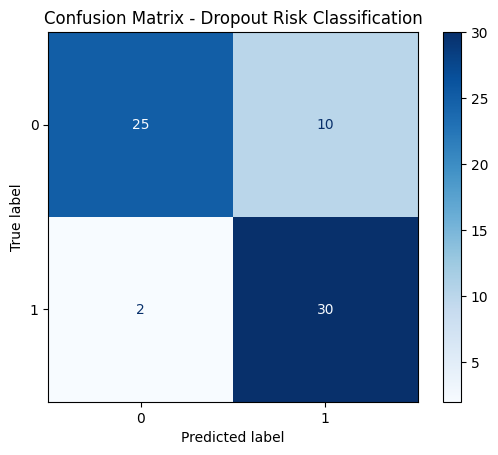

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

# 🧹 Load and Prepare Data
# Replace with your actual data loading
# Example: dropout_rates = pd.read_csv("dropout_data.csv")
# Make sure these columns exist in your dataset:
# ["Dropout Rate", "Division Name", "School Name", "Type of Graduation Rate", ...]

# Define features
categorical_features = ["Division Name", "School Name", "Type of Graduation Rate"]
numeric_features = ["Students in Cohort", "Graduation Rate", "Completion Rate", "Still Enrolled", "Long-Term Absence"]

# Ensure categorical features are strings
for col in categorical_features:
    dropout_rates[col] = dropout_rates[col].astype(str)

# Define features and target
X = dropout_rates[categorical_features + numeric_features]

# 🎯 Convert Dropout Rate to Binary Classification Target
dropout_threshold = 4.1  # Threshold for high-risk classification
y = (dropout_rates["Dropout Rate"] > dropout_threshold).astype(int)

# ⚙️ Preprocessing Pipelines
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# 🌲 Build Random Forest Pipeline with Balanced Class Weights
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"))
])

# 🧪 Split Data and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

# 🔍 Predict with Lowered Threshold to Improve Recall
y_proba = model_pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.4).astype(int)  # Lowered from 0.5 to improve recall

# 📈 Evaluate
print("Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.2f}")

# 📊 Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - Dropout Risk Classification")
plt.show()


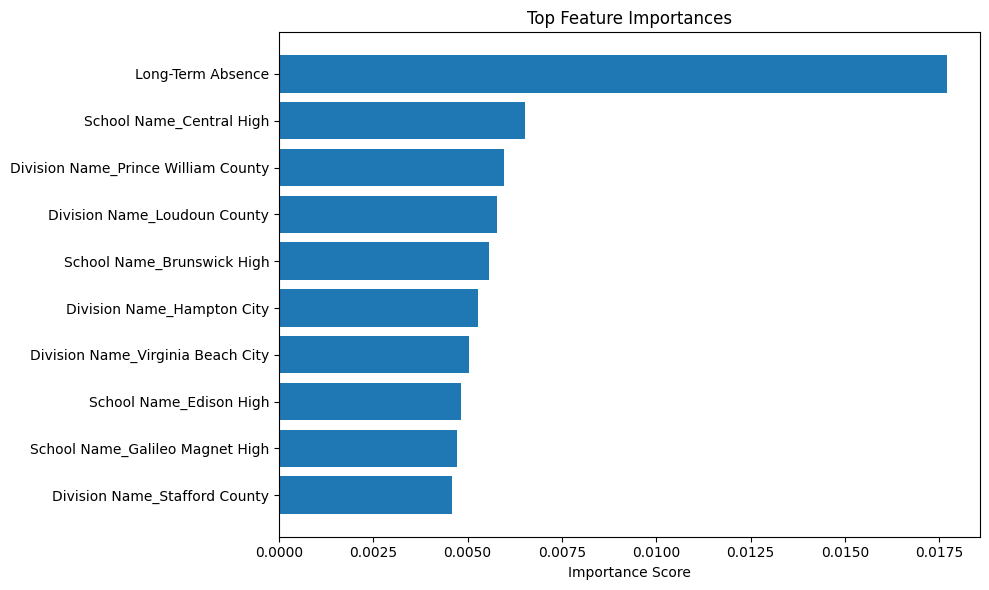

In [ ]:
# 📊 Feature Importance (Plot only relevant features)
# Retrain model directly for feature access
X_train_transformed = preprocessor.fit_transform(X_train)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train_transformed, y_train)

# Get feature names
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]

cleaned_feature_names = [name.replace("num__", "").replace("cat__", "") for name in feature_names]


# Get importances
importances = rf_model.feature_importances_

# Combine names and scores
feature_data = list(zip(cleaned_feature_names, importances))

# Filter out non-causal or outcome-based features
excluded_keywords = [
    "Graduation Rate", "Completion Rate", "Still Enrolled", "Students in Cohort", "Dropouts", "Certificate"
]

filtered_features = [
    (name, score) for name, score in feature_data
    if not any(keyword in name for keyword in excluded_keywords)
]

# Sort filtered features by importance
filtered_features.sort(key=lambda x: x[1], reverse=True)

# Plot top N filtered features
top_n = 10
top_features = filtered_features[:top_n]
names = [name for name, _ in top_features]
scores = [score for _, score in top_features]

plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.barh(range(len(names)), scores[::-1], align="center")
plt.yticks(range(len(names)), names[::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
print(feature_names)

['num__Students in Cohort' 'num__Graduation Rate' 'num__Completion Rate'
 'num__Still Enrolled' 'num__Long-Term Absence' 'cat__Division Name_0'
 'cat__Division Name_Accomack County'
 'cat__Division Name_Albemarle County'
 'cat__Division Name_Alexandria City' 'cat__Division Name_Amelia County'
 'cat__Division Name_Amherst County'
 'cat__Division Name_Appomattox County'
 'cat__Division Name_Arlington County' 'cat__Division Name_Augusta County'
 'cat__Division Name_Bath County' 'cat__Division Name_Bedford County'
 'cat__Division Name_Bland County' 'cat__Division Name_Botetourt County'
 'cat__Division Name_Bristol City' 'cat__Division Name_Brunswick County'
 'cat__Division Name_Buchanan County'
 'cat__Division Name_Buckingham County'
 'cat__Division Name_Buena Vista City'
 'cat__Division Name_Campbell County' 'cat__Division Name_Caroline County'
 'cat__Division Name_Charles City County'
 'cat__Division Name_Charlotte County'
 'cat__Division Name_Chesapeake City'
 'cat__Division Name_Cheste

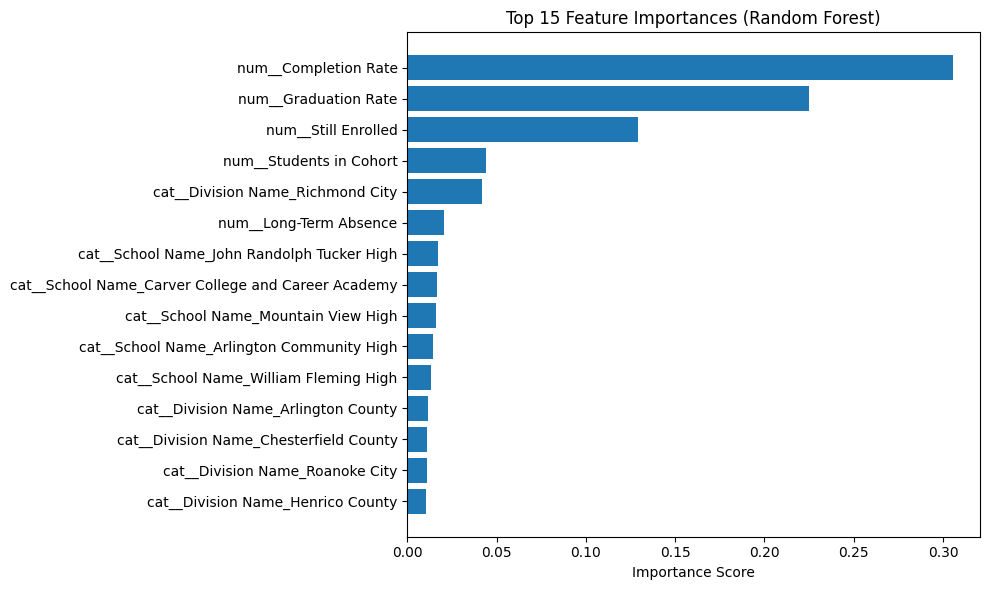

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Fit preprocessor and model (if not already done)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train_transformed, y_train)

# Get feature names after preprocessing
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.barh(range(15), importances[indices][:15][::-1], align="center")
plt.yticks(range(15), [feature_names[i] for i in indices][:15][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


Model Evaluation Metrics:
Accuracy:  0.96
Precision: 1.00
Recall:    0.40
F1 Score:  0.57


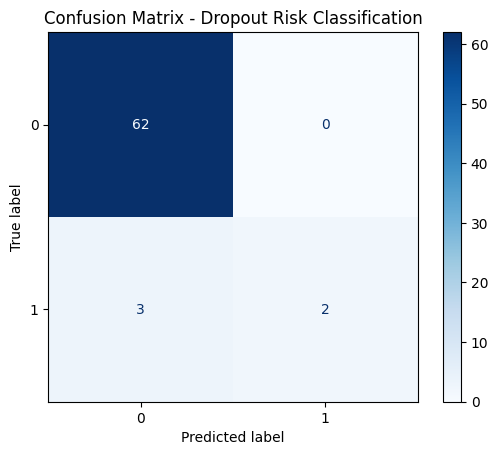

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

# 🧹 Preprocessing Setup
# Define features
categorical_features = ["Division Name", "School Name", "Type of Graduation Rate"]
numeric_features = ["Students in Cohort", "Graduation Rate", "Completion Rate", "Still Enrolled", "Long-Term Absence"]

# Convert categorical columns to strings
for col in categorical_features:
    dropout_rates[col] = dropout_rates[col].astype(str)

# Define features and binary target
X = dropout_rates[categorical_features + numeric_features]

# 🎯 Convert Dropout Rate to Binary (Classification Target)
dropout_threshold = 15  # Set threshold for 'high risk'
y = (dropout_rates["Dropout Rate"] > dropout_threshold).astype(int)

# ⚙️ Define Transformers
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# 🌲 Build the Random Forest Classification Pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# 🧪 Split Data and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

# 🔍 Predict and Evaluate
y_pred = model_pipeline.predict(X_test)

print("Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}")

# 📊 Confusion Matrix Visualization
ConfusionMatrixDisplay.from_estimator(model_pipeline, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Dropout Risk Classification")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

# Assume `dropout_rates` is our cleaned DataFrame

# Step 1: Define feature columns and target variable
target = "Dropout Rate"  # Change this if needed
categorical_features = ["Division Name", "School Name", "Type of Graduation Rate"]  # Update as needed
numeric_features = ["Students in Cohort", "Graduation Rate", "Completion Rate", "Still Enrolled", "Long-Term Absence"]

# Convert categorical columns to strings (fix mixed types issue)
for col in categorical_features:
    dropout_rates[col] = dropout_rates[col].astype(str)

# Step 2: Separate features and target variable
X = dropout_rates[categorical_features + numeric_features]
y = dropout_rates[target]

# Step 3: Preprocessing Pipeline
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Fill missing categorical values
    ("encoder", OneHotEncoder(handle_unknown="ignore"))    # One-hot encode
])

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # Fill missing numerical values
    ("scaler", StandardScaler())                    # Normalize numeric data
])

# Step 4: Combine Transformers
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Step 5: Define RandomForest Model Pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Model
from sklearn.ensemble import RandomForestRegressor

# Change classifier to regressor
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the regression model
model_pipeline.fit(X_train, y_train)

# Evaluate the model (R² Score)
r2_score = model_pipeline.score(X_test, y_test)
print(f"Model R² Score: {r2_score:.2f}")



Model R² Score: 0.72


**Step 3: Train Models**